In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [3]:
API_KEY = "6952618340d7452ea2ebb3b37d242ef9"

BLS_API_URL = "https://api.bls.gov/publicAPI/v2/timeseries/data/"

state_fips = {
    "AL": "01", "AK": "02", "AZ": "04", "AR": "05", "CA": "06", "CO": "08", "CT": "09", "DE": "10",
    "FL": "12", "GA": "13", "HI": "15", "ID": "16", "IL": "17", "IN": "18", "IA": "19", "KS": "20", 
    "KY": "21", "LA": "22", "ME": "23", "MD": "24", "MA": "25", "MI": "26", "MN": "27", "MS": "28", 
    "MO": "29", "MT": "30", "NE": "31", "NV": "32", "NH": "33", "NJ": "34", "NM": "35", "NY": "36", 
    "NC": "37", "ND": "38", "OH": "39", "OK": "40", "OR": "41", "PA": "42", "RI": "44", "SC": "45", 
    "SD": "46", "TN": "47", "TX": "48", "UT": "49", "VT": "50", "VA": "51", "WA": "53", "WV": "54", 
    "WI": "55", "WY": "56"
}

payload = {
    "seriesid": ["LAUST010000000000003", "LAUST020000000000003", "LAUST040000000000003", "LAUST050000000000003", "LAUST060000000000003", 
                "LAUST080000000000003", "LAUST090000000000003", "LAUST100000000000003", "LAUST120000000000003", "LAUST130000000000003", 
                "LAUST150000000000003", "LAUST160000000000003", "LAUST170000000000003", "LAUST180000000000003", "LAUST190000000000003", 
                "LAUST200000000000003", "LAUST210000000000003", "LAUST220000000000003", "LAUST230000000000003", "LAUST240000000000003", 
                "LAUST250000000000003", "LAUST260000000000003", "LAUST270000000000003", "LAUST280000000000003", "LAUST290000000000003", 
                "LAUST300000000000003", "LAUST310000000000003", "LAUST320000000000003", "LAUST330000000000003", "LAUST340000000000003", 
                "LAUST350000000000003", "LAUST360000000000003", "LAUST370000000000003", "LAUST380000000000003", "LAUST390000000000003", 
                "LAUST400000000000003", "LAUST410000000000003", "LAUST420000000000003", "LAUST440000000000003", "LAUST450000000000003", 
                "LAUST460000000000003", "LAUST470000000000003", "LAUST480000000000003", "LAUST490000000000003", "LAUST500000000000003", 
                "LAUST510000000000003", "LAUST530000000000003", "LAUST540000000000003", "LAUST550000000000003", "LAUST560000000000003"],
    "startyear": "2021",
    "endyear": "2024",
    "registrationkey": API_KEY,
}

response = requests.post(BLS_API_URL, json=payload)
data = response.json()


In [5]:
if data["status"] == "REQUEST_SUCCEEDED":
    all_data = []

    for i, series in enumerate(data["Results"]["series"]):
        state_abbr = list(state_fips.keys())[i]
        series_data = series["data"]

        df = pd.DataFrame(series_data)
        df["year"] = df["year"].astype(int)
        df["value"] = df["value"].astype(float)
        df["state"] = state_abbr
        df = df[["year", "periodName", "state", "value"]]
        df.rename(columns={"periodName": "month", "value": "unemployment_rate"}, inplace=True)

        all_data.append(df)

    df_all = pd.concat(all_data, ignore_index=True)

    df_all["date"] = pd.to_datetime(df_all["month"] + " " + df_all["year"].astype(str))

    print(df_all.head())

else:
    print("Error:", data["message"])

   year      month state  unemployment_rate       date
0  2024   December    AL                3.2 2024-12-01
1  2024   November    AL                3.3 2024-11-01
2  2024    October    AL                3.2 2024-10-01
3  2024  September    AL                3.1 2024-09-01
4  2024     August    AL                3.5 2024-08-01


/var/folders/x6/yzhxgjpj4hg4fxvk0qp6p4lm0000gn/T/ipykernel_76637/3470674240.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all["date"] = pd.to_datetime(df_all["month"] + " " + df_all["year"].astype(str))


In [7]:
df_all

,year,month,state,unemployment_rate,date
0,2024,December,AL,3.2,2024-12-01
1,2024,November,AL,3.3,2024-11-01
2,2024,October,AL,3.2,2024-10-01
3,2024,September,AL,3.1,2024-09-01
4,2024,August,AL,3.5,2024-08-01
...,...,...,...,...,...
2395,2021,May,WY,4.7,2021-05-01
2396,2021,April,WY,5.3,2021-04-01
2397,2021,March,WY,5.7,2021-03-01
2398,2021,February,WY,6.1,2021-02-01


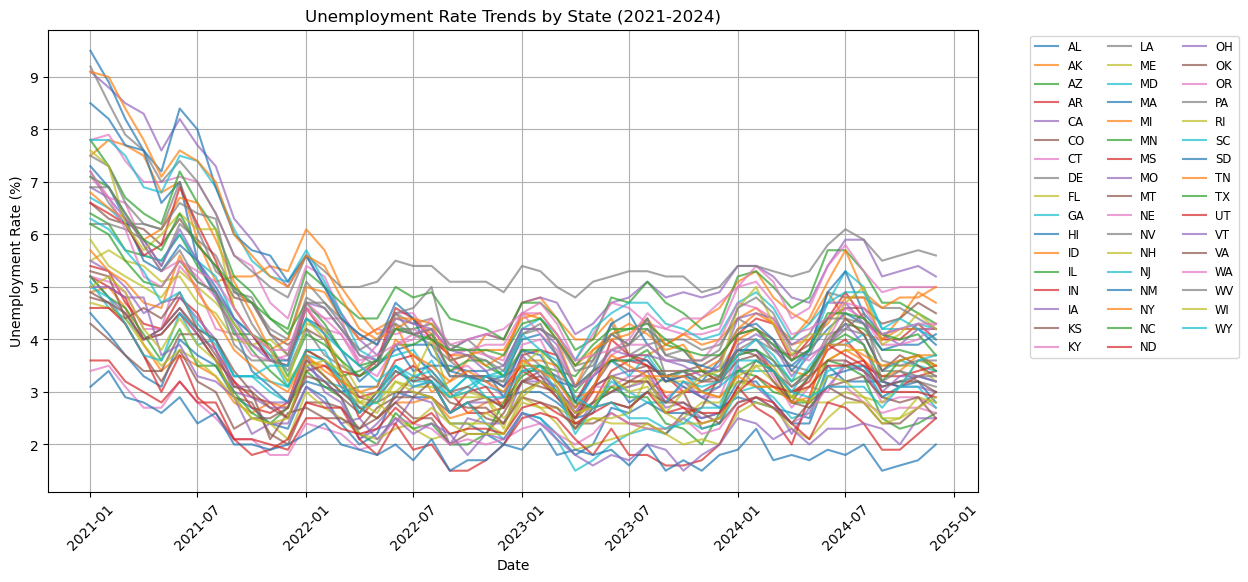

In [9]:
plt.figure(figsize=(12, 6))

for state in df_all["state"].unique():
    df_state = df_all[df_all["state"] == state]
    plt.plot(df_state["date"], df_state["unemployment_rate"], label=state, alpha=0.7)

plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Trends by State (2021-2024)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize="small", ncol=3)
plt.xticks(rotation=45)
plt.grid()
plt.show()

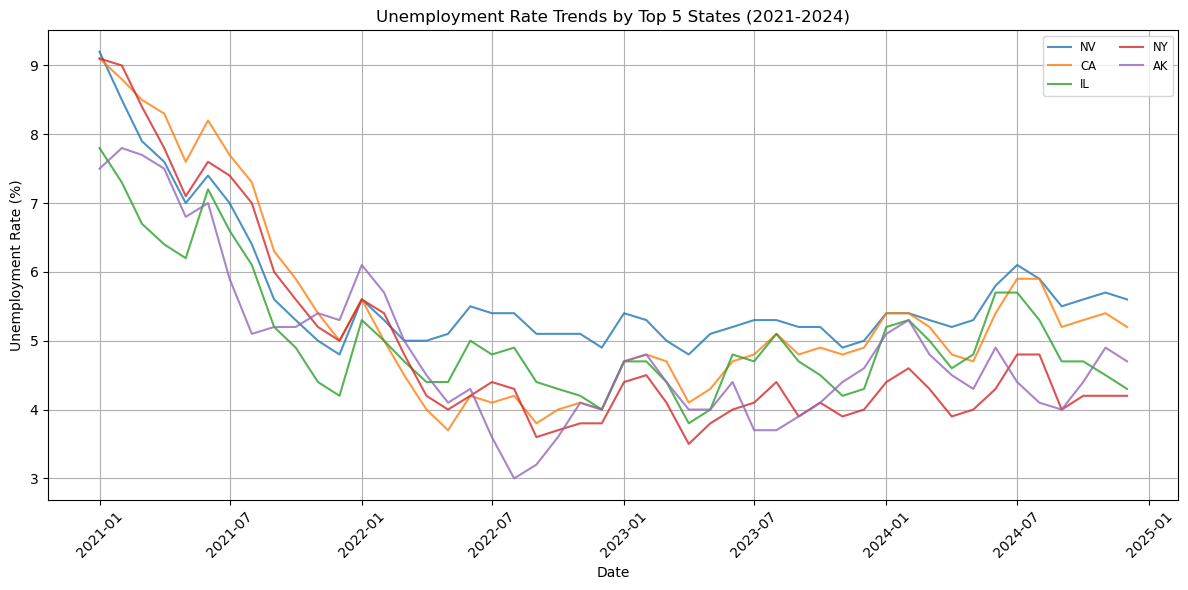

In [29]:
plt.figure(figsize=(12, 6))

top_states = df_all.groupby("state")["unemployment_rate"].mean().nlargest(5).index

for state in top_states:
    df_state = df_all[df_all["state"] == state]
    plt.plot(df_state["date"], df_state["unemployment_rate"], label=state, alpha=0.8)

plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Trends by Top 5 States (2021-2024)")
plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('unemployment.png')
plt.show()


In [13]:
avg_unemployment = df_all[~df_all["state"].isin(["AK", "HI"])] \
    .groupby("state")["unemployment_rate"].mean().reset_index()


In [15]:
url_state = "https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_500k.zip"
state_gdf = gpd.read_file(url_state)


In [17]:
exclude_list = [15, 72, 2, 60, 66, 69, 78, 11]
state_gdf = state_gdf.loc[~state_gdf['STATEFP'].astype(int).isin(exclude_list)]

state_gdf = state_gdf.to_crs(5070)


In [19]:
state_gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,56,01779807,0400000US56,56,WY,Wyoming,00,251458712294,1867503716,"POLYGON ((-1180474.958 2539524.670, -1179737.4..."
2,24,01714934,0400000US24,24,MD,Maryland,00,25151992308,6979074857,"MULTIPOLYGON (((1722852.650 1842859.018, 17227..."
4,05,00068085,0400000US05,05,AR,Arkansas,00,134660767709,3121950081,"POLYGON ((122656.347 1495564.869, 122680.321 1..."
5,38,01779797,0400000US38,38,ND,North Dakota,00,178694310772,4414779956,"POLYGON ((-596854.999 2898545.980, -596834.890..."
6,10,01779781,0400000US10,10,DE,Delaware,00,5046731559,1399179670,"MULTIPOLYGON (((1727522.772 2019061.203, 17277..."


In [21]:
merged = state_gdf.set_index('STUSPS').join(avg_unemployment.set_index('state'))


<Figure size 3600x2400 with 0 Axes>

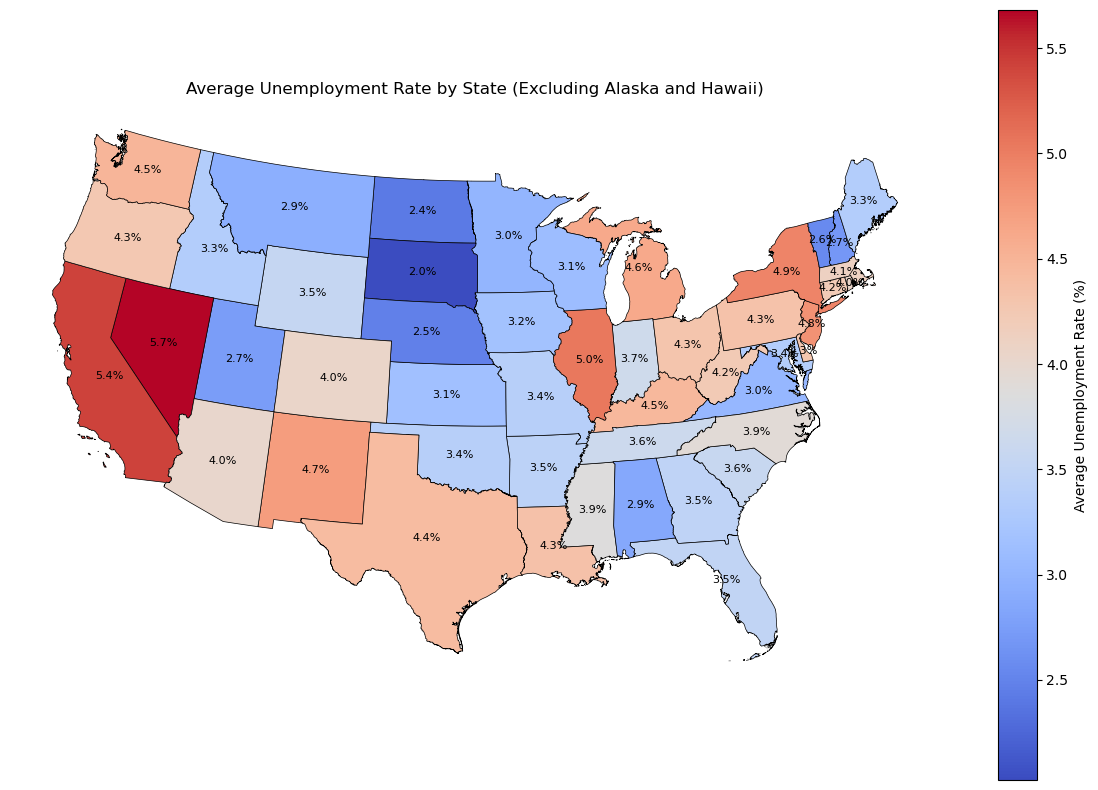

In [33]:
plt.figure(figsize=(12, 8), dpi = 300)
ax = merged.plot(column='unemployment_rate', cmap='coolwarm', legend=True, figsize=(15, 10),
                 legend_kwds={'label': "Average Unemployment Rate (%)", 'orientation': "vertical"}, edgecolor='black', linewidth=0.5)

for idx, row in merged.iterrows():
    centroid = row['geometry'].centroid
    x, y = centroid.x, centroid.y

    ax.text(x, y, f"{row['unemployment_rate']:.1f}%", 
            fontsize=8, ha='center', va='center', color='black')
    
plt.title("Average Unemployment Rate by State (Excluding Alaska and Hawaii)")
plt.axis('off')
plt.savefig('stateunemployment.png');

# Other Thing

In [36]:
annual = pd.read_csv('annual.csv')
annual.head()

,observation_date,MEHOINUSAKA672N_20240910,MEHOINUSALA672N_20240910,MEHOINUSARA672N_20240910,MEHOINUSAZA672N_20240910,MEHOINUSCAA672N_20240910,MEHOINUSCOA672N_20240910,MEHOINUSCTA672N_20240910,MEHOINUSDEA672N_20240910,MEHOINUSFLA672N_20240910,...,MEHOINUSSDA672N_20240910,MEHOINUSTNA672N_20240910,MEHOINUSTXA672N_20240910,MEHOINUSUTA672N_20240910,MEHOINUSVAA672N_20240910,MEHOINUSVTA672N_20240910,MEHOINUSWAA672N_20240910,MEHOINUSWIA672N_20240910,MEHOINUSWVA672N_20240910,MEHOINUSWYA672N_20240910
0,1984-01-01,85070,45510,41210,56330,66480,67830,78740,67880,52020,...,51030,44120,60530,60620,69740,59360,65770,54530,44280,62610
1,1985-01-01,88440,46610,44370,60710,68600,71660,79050,58430,54270,...,46130,45200,60370,64170,72280,66110,61020,59110,40640,56140
2,1986-01-01,78440,47860,46850,63790,72570,68020,81850,64100,57160,...,49770,45670,60440,65740,74330,61530,67240,66110,41180,58930
3,1987-01-01,80410,47750,45550,64720,72940,64060,79510,70760,59250,...,51180,51250,59820,64190,72580,61490,66100,63800,41630,66760
4,1988-01-01,77240,46550,47070,61680,70670,61170,84500,71180,59280,...,52020,48660,58250,61400,76180,67640,75430,69010,45160,61640


In [40]:
annual.columns

Index(['observation_date', 'MEHOINUSAKA672N_20240910',
       'MEHOINUSALA672N_20240910', 'MEHOINUSARA672N_20240910',
       'MEHOINUSAZA672N_20240910', 'MEHOINUSCAA672N_20240910',
       'MEHOINUSCOA672N_20240910', 'MEHOINUSCTA672N_20240910',
       'MEHOINUSDEA672N_20240910', 'MEHOINUSFLA672N_20240910',
       'MEHOINUSGAA672N_20240910', 'MEHOINUSHIA672N_20240910',
       'MEHOINUSIAA672N_20240910', 'MEHOINUSIDA672N_20240910',
       'MEHOINUSILA672N_20240910', 'MEHOINUSINA672N_20240910',
       'MEHOINUSKSA672N_20240910', 'MEHOINUSKYA672N_20240910',
       'MEHOINUSLAA672N_20240910', 'MEHOINUSMAA672N_20240910',
       'MEHOINUSMDA672N_20240910', 'MEHOINUSMEA672N_20240910',
       'MEHOINUSMIA672N_20240910', 'MEHOINUSMNA672N_20240910',
       'MEHOINUSMOA672N_20240910', 'MEHOINUSMSA672N_20240910',
       'MEHOINUSMTA672N_20240910', 'MEHOINUSNCA672N_20240910',
       'MEHOINUSNDA672N_20240910', 'MEHOINUSNEA672N_20240910',
       'MEHOINUSNHA672N_20240910', 'MEHOINUSNJA672N_20240910',


In [42]:
state_mapping = {
    'MEHOINUSAKA672N_20240910': 'Alaska', 'MEHOINUSALA672N_20240910': 'Alabama', 'MEHOINUSARA672N_20240910': 'Arkansas',
    'MEHOINUSAZA672N_20240910': 'Arizona', 'MEHOINUSCAA672N_20240910': 'California', 'MEHOINUSCOA672N_20240910': 'Colorado', 
    'MEHOINUSCTA672N_20240910': 'Connecticut', 'MEHOINUSDEA672N_20240910': 'Delaware', 'MEHOINUSFLA672N_20240910': 'Florida', 
    'MEHOINUSGAA672N_20240910': 'Georgia', 'MEHOINUSHIA672N_20240910': 'Hawaii', 'MEHOINUSIAA672N_20240910': 'Iowa', 
    'MEHOINUSIDA672N_20240910': 'Idaho', 'MEHOINUSILA672N_20240910': 'Illinois', 'MEHOINUSINA672N_20240910': 'Indiana', 
    'MEHOINUSKSA672N_20240910': 'Kansas', 'MEHOINUSKYA672N_20240910': 'Kentucky', 'MEHOINUSLAA672N_20240910': 'Louisiana', 
    'MEHOINUSMAA672N_20240910': 'Massachusetts', 'MEHOINUSMDA672N_20240910': 'Maryland', 'MEHOINUSMEA672N_20240910': 'Maine', 
    'MEHOINUSMIA672N_20240910': 'Michigan', 'MEHOINUSMNA672N_20240910': 'Minnesota', 'MEHOINUSMOA672N_20240910': 'Missouri', 
    'MEHOINUSMSA672N_20240910': 'Mississippi', 'MEHOINUSMTA672N_20240910': 'Montana', 'MEHOINUSNCA672N_20240910': 'North Carolina', 
    'MEHOINUSNDA672N_20240910': 'North Dakota', 'MEHOINUSNEA672N_20240910': 'Nebraska', 'MEHOINUSNHA672N_20240910': 'New Hampshire', 
    'MEHOINUSNJA672N_20240910': 'New Jersey', 'MEHOINUSNMA672N_20240910': 'New Mexico', 'MEHOINUSNVA672N_20240910': 'Nevada', 
    'MEHOINUSNYA672N_20240910': 'New York', 'MEHOINUSOHA672N_20240910': 'Ohio', 'MEHOINUSOKA672N_20240910': 'Oklahoma', 
    'MEHOINUSORA672N_20240910': 'Oregon', 'MEHOINUSPAA672N_20240910': 'Pennsylvania', 'MEHOINUSRIA672N_20240910': 'Rhode Island', 
    'MEHOINUSSCA672N_20240910': 'South Carolina', 'MEHOINUSSDA672N_20240910': 'South Dakota', 'MEHOINUSTNA672N_20240910': 'Tennessee', 
    'MEHOINUSTXA672N_20240910': 'Texas', 'MEHOINUSUTA672N_20240910': 'Utah', 'MEHOINUSVAA672N_20240910': 'Virginia', 
    'MEHOINUSVTA672N_20240910': 'Vermont', 'MEHOINUSWAA672N_20240910': 'Washington', 'MEHOINUSWIA672N_20240910': 'Wisconsin', 
    'MEHOINUSWVA672N_20240910': 'West Virginia', 'MEHOINUSWYA672N_20240910': 'Wyoming'}

annual.rename(columns=state_mapping, inplace=True)

In [46]:
annual.columns

Index(['observation_date', 'Alaska', 'Alabama', 'Arkansas', 'Arizona',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas',
       'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine',
       'Michigan', 'Minnesota', 'Missouri', 'Mississippi', 'Montana',
       'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire',
       'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Vermont',
       'Washington', 'Wisconsin', 'West Virginia', 'Wyoming'],
      dtype='object')

In [60]:
annual['observation_date'] = pd.to_datetime(annual['observation_date']).dt.year

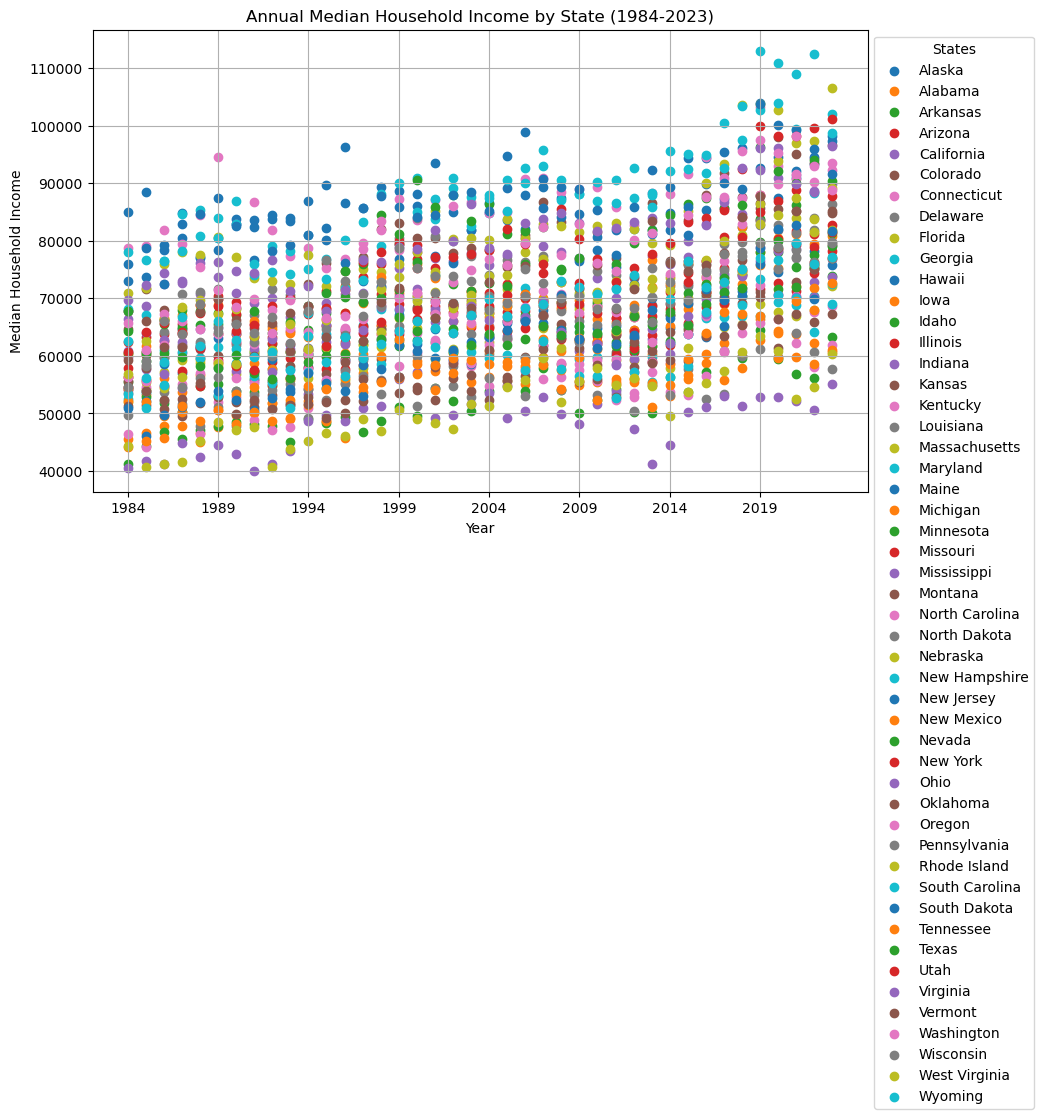

In [68]:
plt.figure(figsize=(10, 6))

for state in annual.columns:
    if state != 'observation_date':
        plt.scatter(annual['observation_date'], annual[state], label=state)

plt.xticks(range(annual['observation_date'].min(), annual['observation_date'].max() + 1, 5))

plt.xlabel('Year')
plt.ylabel('Median Household Income')
plt.title('Annual Median Household Income by State (1984-2023)')
plt.legend(title='States', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.grid(True)
plt.show()